# Movimientos de plata por mes.

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
archivo = "ingresos_egresos.csv"
carpeta = os.path.join(os.path.realpath('..'), 'files', archivo)
datos = pd.read_csv(carpeta, delimiter=";")

# Calcular ingresos por mes
ingresos = datos[datos["tipo"] == "ingreso"]
ingresos['fecha'] = pd.to_datetime(ingresos['fecha'], format='%Y-%m-%d')
ingresos = ingresos.set_index('fecha')
ingresos_por_mes = ingresos.resample('M')['monto'].sum().rename("ingresos")

# Calcular egresos por mes
egresos = datos[datos["tipo"] == "egreso"]
egresos['fecha'] = pd.to_datetime(egresos['fecha'], format='%Y-%m-%d')
egresos = egresos.set_index('fecha')
egresos_por_mes = egresos.resample('M')['monto'].sum().rename("egresos")

/tmp/ipykernel_3858/2783833301.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ingresos['fecha'] = pd.to_datetime(ingresos['fecha'], format='%Y-%m-%d')
/tmp/ipykernel_3858/2783833301.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  egresos['fecha'] = pd.to_datetime(egresos['fecha'], format='%Y-%m-%d')


In [30]:
meses = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']
merged_df = pd.merge(ingresos_por_mes, egresos_por_mes, on='fecha', how='inner').T
meses_dict = {i+1: mes for i, mes in enumerate(meses)}
merged_df.columns = merged_df.columns.month.map(meses_dict)
merged_df


fecha,enero,febrero
ingresos,40400,252830
egresos,203260,240560


In [46]:
movimientos = datos.groupby("tipo").sum("monto")
movimientos

,monto
tipo,
egreso,443820
ingreso,293230


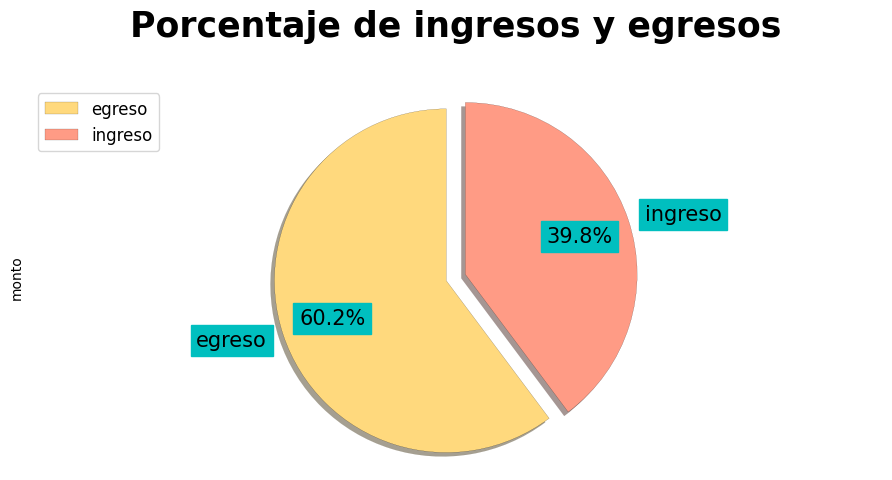

In [50]:
# Grafico de torta

colores = ["#FFD97D", "#FF9B85"]
explode = 0.07, 0.07

movimientos.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(11, 5), subplots=True,
                pctdistance=0.7, radius=1.2, shadow=True, colors=colores, explode=explode,
                textprops={'fontsize': 15, 'color': 'black', 'backgroundcolor': 'c'},
                wedgeprops={'linewidth': 0.1, 'edgecolor': 'black'})

plt.title("Porcentaje de ingresos y egresos", pad=35, loc="center",
          fontdict={'fontsize': 25, 'fontweight': 'bold', 'backgroundcolor': 'white'})

plt.legend(loc=2, fontsize=12)
plt.axis('equal')
plt.show()